<a href="https://colab.research.google.com/github/Qossai/Customer-Churn/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


The objective of this churn prediction project is to develop a machine learning model that can accurately predict potential customer turnover, particularly those who may discontinue a subscription or service. This task is crucial for subscription-based or recurring revenue businesses, notably in the telecom industry. The project aims not only to build an effective churn prediction model but also to highlight the importance of ongoing data monitoring and adjustments to preserve model accuracy and functionality.

In the telecom sector, churn prediction targets identifying subscribers poised to switch to competitors or cancel their current contracts. This capability is essential due to its significant impact on a company's revenue and profitability in a fiercely competitive market. Through churn prediction, telecom providers can identify at-risk customers and proactively engage in retention strategies, thereby enhancing customer loyalty and securing their revenue stream.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install numpy==1.24.2
!pip install pandas==1.5.3
!pip install matplotlib==3.7.0
!pip install seaborn==0.12.2
!pip install scikit_learn==1.2.2
!pip install xgboost==1.7.4
!pip install deepchecks==0.12.0
!pip install projectpro --upgrade
!pip install sweetviz

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
from projectpro import preserve, save_point, model_snapshot, feedback, show_video
import sys
preserve("fcTel2")

<IPython.core.display.Javascript object>

In [4]:
#import matplotlib.pyplot as plt
#import seaborn as sns

In [5]:
np.set_printoptions(threshold=sys.maxsize)

In [6]:
pd.set_option('display.max_columns', 200)

In [7]:
# Read data
df=pd.read_csv('https://s3.amazonaws.com/projex.dezyre.com/telecom-machine-learning-project-for-customer-churn/materials/Telecom_data.csv')

In [8]:
#Automated EDA
#report = sv.analyze(df)

# Show the report
#report.show_html('sweetviz_report.html')

**Data Exploration**

In [9]:
df.tail()

,Customer ID,Month,Month of Joining,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,arpu,night_pck_user,fb_user,aug_vbc_5g,offer,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,Customer Status,Churn Value
653748,ksdlqrgoihlmp162977,8,6,98932,Female,22.0,Yes,No,0.0,nxoadzllyxzg162977,bxpevtcjeectllyrdt162977,WA,Yakima County,America/Los_Angeles,509,US,46.32,-120.15,45.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0,0.00,0.00,0.00,3990.18,2121.43,969.35,19.41,1050.93,122.57,0,0.11,41.57,54.13,0,12.0,20.31,16227.68,1098.84,793.17,195.90,0.0,1.0,242.51,No Offer,Yes,9.0,No,No,Yes,None,67,No,No,Yes,No,No,Yes,Yes,Yes,Bank Withdrawal,cgkwzaqcctmn82402,3,Not Applicable,Not Applicable,Stayed,0
653749,ksdlqrgoihlmp162977,9,6,98932,Female,22.0,Yes,No,0.0,nxoadzllyxzg162977,bxpevtcjeectllyrdt162977,WA,Yakima County,America/Los_Angeles,509,US,46.32,-120.15,9.77,62.58,51.17,366.40,1.48,12.160000,365.42,128.61,8.21,0,32.35,23.44,30.17,26.70,69.91,45.69,41.93,14.31,23.27,0,0.02,70.42,36.95,267,2.0,3.10,217.40,101.26,99.67,310.83,0.0,1.0,68.94,No Offer,Yes,1.0,Yes,None,Yes,None,84,No,Yes,No,No,Yes,No,Yes,Yes,Wallet Balance,snzcbrohetar69724,4,Not Applicable,Not Applicable,Stayed,0
653750,ksdlqrgoihlmp162977,10,6,98932,Female,22.0,Yes,No,0.0,nxoadzllyxzg162977,bxpevtcjeectllyrdt162977,WA,Yakima County,America/Los_Angeles,509,US,46.32,-120.15,329.80,79.84,45.18,192.32,5.97,281.580000,190.72,219.40,5.67,0,6.73,26.69,12.82,126.08,367.51,14.29,75.43,35.22,13.98,0,0.09,9.42,14.96,5527,0.0,0.00,0.00,0,0,163.20,1.0,NaN,0.00,B,Yes,11.0,Yes,Yes,No,NaN,0,Yes,No,No,No,No,No,No,No,Credit Card,girqesisbhkca38142,2,Not Applicable,Not Applicable,Stayed,0
653751,ksdlqrgoihlmp162977,11,6,98932,Female,22.0,Yes,No,0.0,nxoadzllyxzg162977,bxpevtcjeectllyrdt162977,WA,Yakima County,America/Los_Angeles,509,US,46.32,-120.15,277.29,24.29,303.62,197.00,3.33,20.389696,162.19,200.57,8.61,0,35.87,2.46,0.88,93.52,284.86,50.67,23.32,1404.82,13.64,0,0.06,40.32,41.48,286,0.0,0.00,0.00,0,0,924.07,NaN,NaN,0.00,No Offer,Yes,9.0,Yes,Yes,No,NaN,28,No,Yes,No,Yes,No,Yes,Yes,No,Bank Withdrawal,daplvxnhhqjt35633,3,Not Applicable,Not Applicable,Stayed,0
653752,ksdlqrgoihlmp162977,12,6,98932,Female,22.0,Yes,No,0.0,nxoadzllyxzg162977,bxpevtcjeectllyrdt162977,WA,Yakima County,America/Los_Angeles,509,US,46.32,-120.15,40.53,121.47,290.16,12.41,10.39,1.740000,347.15,177.04,9.83,0,10.70,5.05,5.10,194.15,331.60,1847.90,119.09,4.81,2.29,0,0.12,78.25,43.14,594,0.0,0.00,254687.00,0,0,346.56,NaN,NaN,0.00,No Offer,Yes,11.0,Yes,Yes,No,NaN,0,No,No,No,No,No,No,No,No,Credit Card,bwaebkwmzbxs93643,1,Support,Attitude of support person,Churned,1


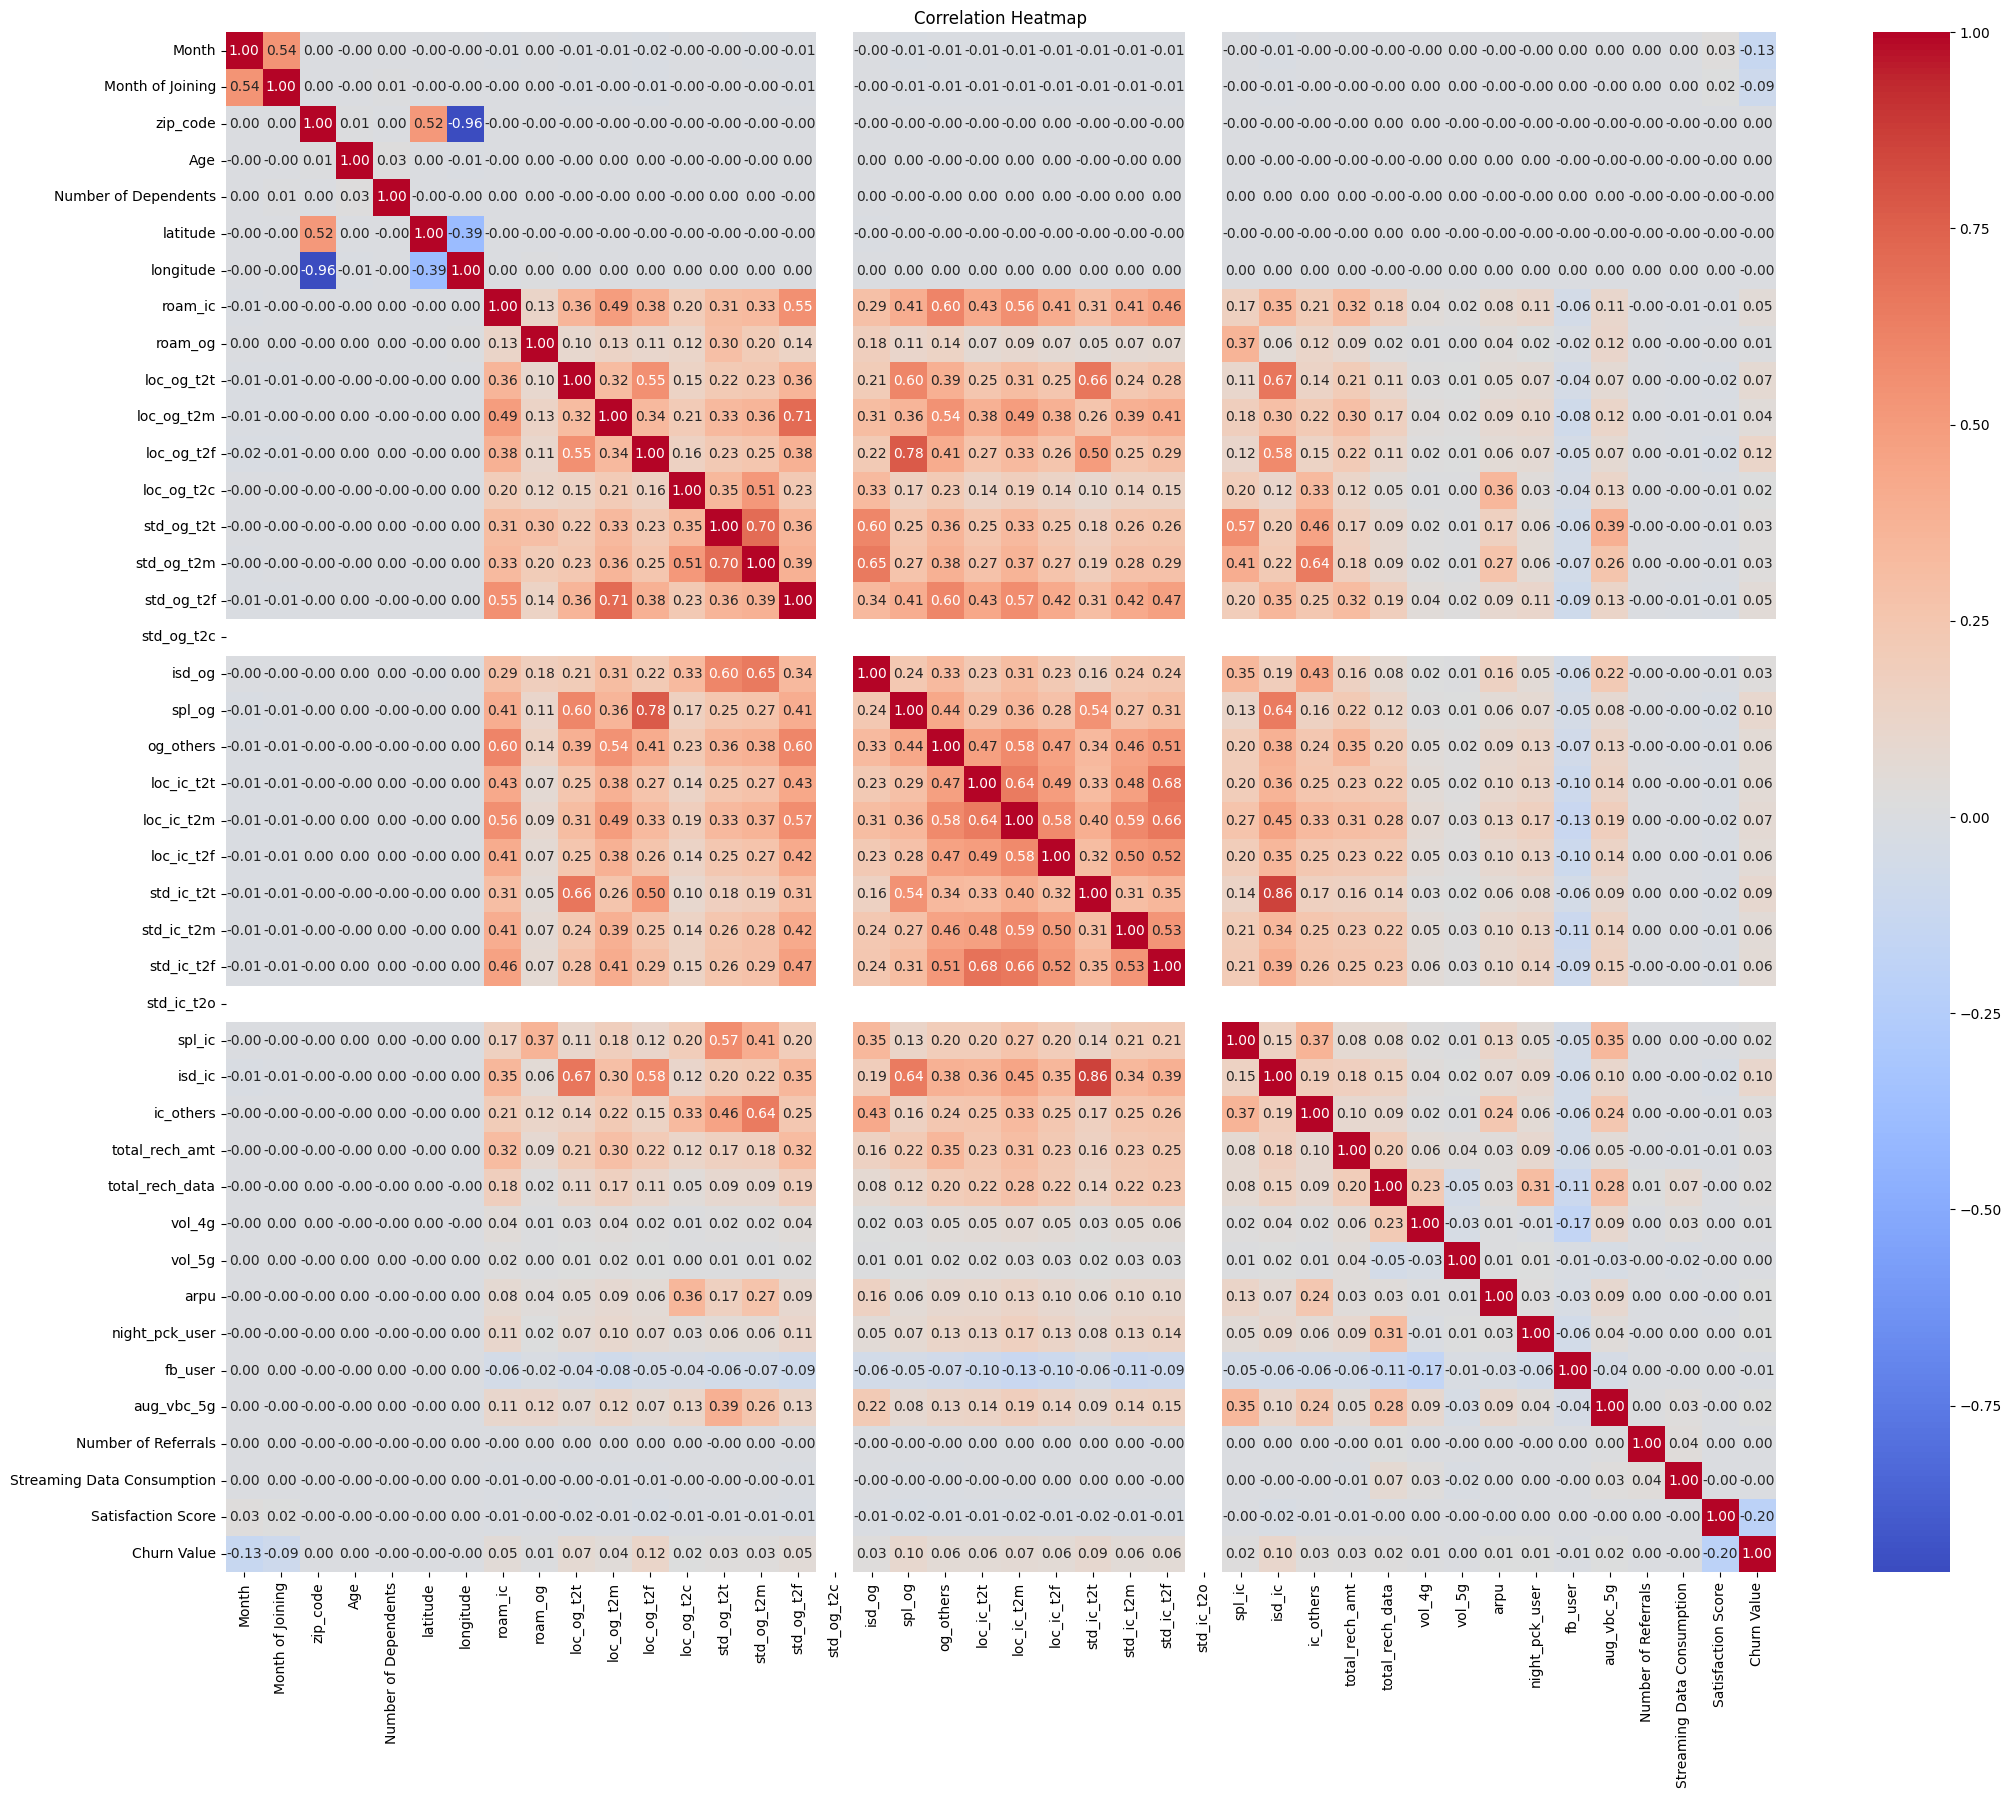

In [10]:
df['Churn Value'] = df['Churn Value'].astype(int)

# Correlation matrix
corr = df.corr()

plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
#check the shape of the dataframe
df.shape

(653753, 74)

In [12]:
# Check the Information of the Dataframe, datatypes and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653753 entries, 0 to 653752
Data columns (total 74 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Customer ID                 653753 non-null  object 
 1   Month                       653753 non-null  int64  
 2   Month of Joining            653753 non-null  int64  
 3   zip_code                    653753 non-null  int64  
 4   Gender                      653753 non-null  object 
 5   Age                         653753 non-null  float64
 6   Married                     653753 non-null  object 
 7   Dependents                  653753 non-null  object 
 8   Number of Dependents        653753 non-null  float64
 9   Location ID                 653753 non-null  object 
 10  Service ID                  653753 non-null  object 
 11  state                       653753 non-null  object 
 12  county                      653753 non-null  object 
 13  timezone      

Based on the above, these features has missing data:  
total_rech_data, night_pck_user, fb_user, Internet Type

In [13]:
#columns names
df.columns

Index(['Customer ID', 'Month', 'Month of Joining', 'zip_code', 'Gender', 'Age',
       'Married', 'Dependents', 'Number of Dependents', 'Location ID',
       'Service ID', 'state', 'county', 'timezone', 'area_codes', 'country',
       'latitude', 'longitude', 'roam_ic', 'roam_og', 'loc_og_t2t',
       'loc_og_t2m', 'loc_og_t2f', 'loc_og_t2c', 'std_og_t2t', 'std_og_t2m',
       'std_og_t2f', 'std_og_t2c', 'isd_og', 'spl_og', 'og_others',
       'loc_ic_t2t', 'loc_ic_t2m', 'loc_ic_t2f', 'std_ic_t2t', 'std_ic_t2m',
       'std_ic_t2f', 'std_ic_t2o', 'spl_ic', 'isd_ic', 'ic_others',
       'total_rech_amt', 'total_rech_data', 'vol_4g', 'vol_5g', 'arpu_5g',
       'arpu_4g', 'arpu', 'night_pck_user', 'fb_user', 'aug_vbc_5g', 'offer',
       'Referred a Friend', 'Number of Referrals', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Streaming Data Consumption', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', '

In [14]:
df.describe()

,Month,Month of Joining,zip_code,Age,Number of Dependents,latitude,longitude,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu,night_pck_user,fb_user,aug_vbc_5g,Number of Referrals,Streaming Data Consumption,Satisfaction Score,Churn Value
count,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.0,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.0,653753.000000,653753.000000,653753.000000,653753.000000,443849.000000,653753.000000,653753.000000,653753.000000,280650.000000,243359.000000,653753.000000,653753.000000,653753.000000,653753.000000,653753.000000
mean,9.508209,5.823574,90386.180128,36.627306,1.161315,37.652731,-114.392353,249.650062,267.554526,834.627907,678.555093,32.269235,30.328622,577.609175,441.073443,34.878531,0.0,49.607952,88.964193,98.301149,846.741273,720.747069,330.918680,369.433263,306.379408,125.712469,0.0,0.251306,251.280851,144.004213,1687.052445,4.852747,192.096023,7967.055649,781.196280,0.217638,0.795796,530.525621,4.337965,27.574284,3.131712,0.045682
std,3.298742,2.855148,8412.506653,12.168730,2.245762,4.687151,10.537540,424.617016,625.610117,1589.595058,1112.490535,59.016877,67.610983,1306.899719,990.214161,57.920941,0.0,113.245522,168.699998,161.822511,1216.215767,1009.686119,483.251341,631.201630,437.613149,185.826000,0.0,0.438407,442.322772,293.132705,2980.015423,8.319981,592.101187,36093.904463,1807.269437,0.412640,0.403120,1402.826168,3.768386,26.349552,1.249076,0.208796
min,1.000000,1.000000,71601.000000,19.000000,0.000000,31.790000,-124.630000,-25.506563,-109.250816,-31.570579,0.000000,-6.975713,0.000000,0.000000,0.000000,-2.193700,0.0,0.000000,-42.425137,-12.746303,0.000000,0.000000,0.000000,-41.100527,0.000000,0.000000,0.0,0.000000,-49.675211,-58.302931,0.000000,0.000000,0.000000,0.000000,-2258.680000,0.000000,0.000000,-374.893876,0.000000,0.000000,1.000000,0.000000
25%,7.000000,3.000000,88424.000000,28.000000,0.000000,34.140000,-121.650000,12.090000,14.710000,32.700000,26.260000,1.460000,1.610000,33.120000,25.560000,1.200000,0.0,3.250000,4.940000,3.430000,85.570000,84.170000,36.110000,42.460000,32.190000,12.460000,0.0,0.040000,26.980000,20.330000,72.000000,0.000000,0.000000,0.000000,118.940000,0.000000,1.000000,0.000000,0.000000,2.000000,3.000000,0.000000
50%,10.000000,6.000000,93032.000000,34.000000,0.000000,36.080000,-118.390000,50.560000,75.100000,171.330000,135.460000,7.800000,8.180000,174.600000,134.800000,6.340000,0.0,17.190000,25.580000,17.830000,171.490000,168.390000,72.060000,84.470000,64.760000,24.980000,0.0,0.080000,53.700000,40.540000,374.000000,0.000000,47.010000,362.380000,348.540000,0.000000,1.000000,117.320000,4.000000,20.000000,3.000000,0.000000
75%,12.000000,8.000000,95551.000000,43.000000,1.000000,38.600000,-108.800000,162.030000,135.280000,309.090000,618.210000,14.090000,14.700000,316.240000,244.490000,36.640000,0.0,31.140000,46.190000,106.790000,1259.270000,1090.065814,496.790000,126.270000,448.830000,186.710000,0.0,0.210000,80.370000,60.730000,1089.000000,7.000000,154.900000,964.720000,580.650000,0.000000,1.000000,311.750000,8.000000,49.000000,4.000000,0.000000
max,14.000000,12.000000,99403.000000,80.000000,9.000000,48.990000,-89.740000,1719.430000,3161.780000,6431.250000,4212.010000,283.530000,336.130000,7366.160000,5622.540000,217.440000,0.0,765.050000,1020.710000,609.800000,4363.950000,3847.169616,1872.340000,2527.070000,1619.680000,663.930000,0.0,2.330000,1917.369911,1344.130000,11900.000000,32.000000,4503.930000,254687.000000,9394.500000,1.000000,1.000000,8214.870000,11.000000,85.000

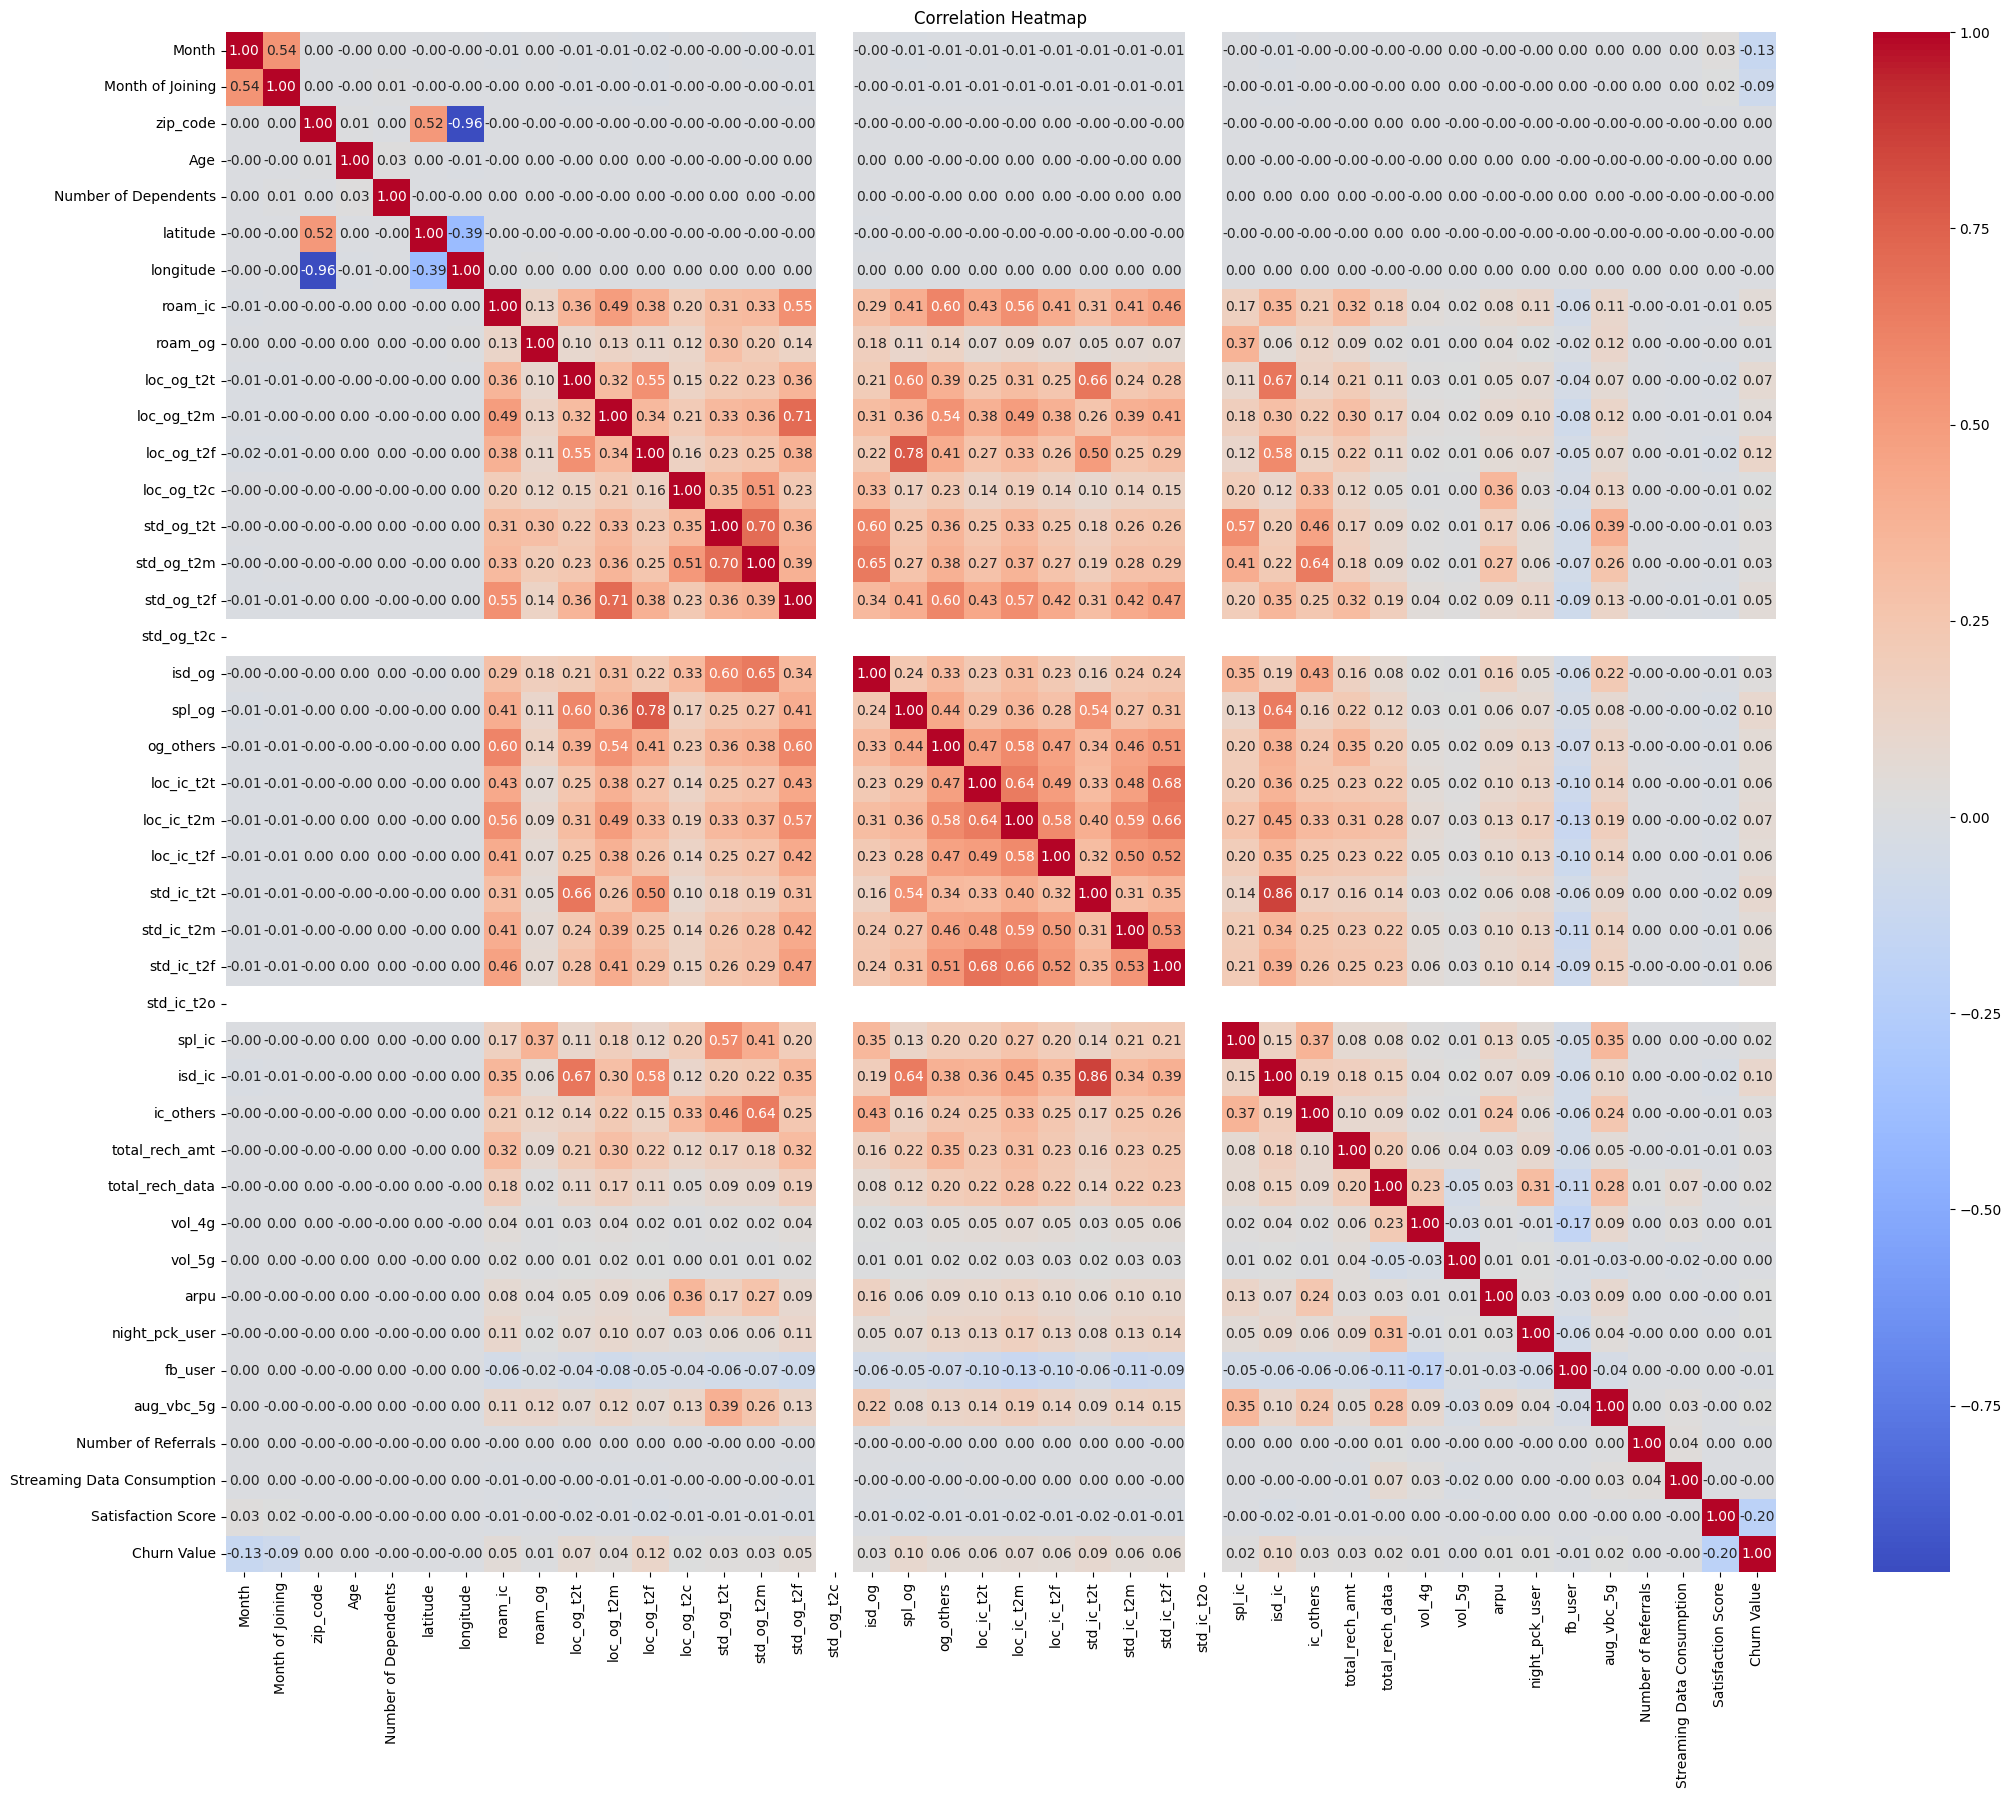

In [15]:
df['Churn Value'] = df['Churn Value'].astype(int)

corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(25,20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [16]:
#let's identify and sum the na/ null values
df.isna().sum()

Customer ID           0
Month                 0
Month of Joining      0
zip_code              0
Gender                0
                     ..
Satisfaction Score    0
Churn Category        0
Churn Reason          0
Customer Status       0
Churn Value           0
Length: 74, dtype: int64

In [17]:
#Null values for Internet Type feature
df['Internet Type'].isna().sum()

217332

In [18]:
#Null values for Recharge Data feature
df['total_rech_data'].isna().sum()

209904

In [19]:
#Null values for night_pck_user feature
df['night_pck_user'].isna().sum()

373103

In [20]:
#Null values for fb_user feature
df['fb_user'].isna().sum()

410394

In [21]:
# Missing value percentage
df['total_rech_data'].isna().sum()/df.shape[0]

0.321075390858627

# Observation:  
The missing values could indicate customers who either did not recharge their accounts or whose recharge details were not captured. Additionally, it's plausible that customers with absent recharge data might have been granted complimentary data services, eliminating the need for a recharge. Alternatively, these missing entries might stem from technical glitches, including errors in data logging or system malfunctions.**bold text**

In [22]:
# Checking the value counts of Internet Service where total recharge data was null
df[df['total_rech_data'].isna()]['Internet Service'].value_counts(dropna=False)

Yes    209904
Name: Internet Service, dtype: int64

#Observation:  
It appears that customers lacking recharge data have subscribed to internet services. The subsequent action should be to verify whether they have utilized these services.

In [23]:
#count how many customers have not recharged their data and categorizes these counts by their subscription status to 'Unlimited Data'.
df[(df['total_rech_data'].isna())]['Unlimited Data'].value_counts()

Yes    181040
No      28864
Name: Unlimited Data, dtype: int64

Observation:  
The output indicates that 28,864 customers who didn't subscribe to the Unlimited Data package likely had no data to recharge, while 181,040 customers subscribed to the Unlimited Data package but did not recharge.

In [24]:
## Lets check Average Revenue for 4g and 5g
df[(df['total_rech_data'].isna())][['arpu_4g','arpu_5g']].value_counts()

arpu_4g         arpu_5g       
Not Applicable  Not Applicable    195182
297.57          8530.983629            4
544.17          8536.565906            3
395.94          8533.210427            3
290.09          8530.814304            3
                                   ...  
222.42          1468.94                1
222.56          8529.28563             1
222.67          8529.28812             1
222.73          8529.289478            1
2559.56         8582.188229            1
Length: 14247, dtype: int64

Observation:  
When the arpu (Average Revenue Per User) doesn't apply, we can assume that the user isn't bringing in any money for the company. So, it makes sense to fill missing data in the total_rech_data column with 0, meaning they didn't recharge at all.

In [25]:
# Check the value counts of ARPU 4g and 5g
df[['arpu_4g','arpu_5g']].value_counts()

arpu_4g         arpu_5g       
Not Applicable  Not Applicable    195182
0               0                 184117
                63                 13024
63              0                  12969
254687          0                  10911
                                   ...  
192.88          566.93                 1
192.89          274.15                 1
                2848.71                1
                648.54                 1
2416.82         167.18                 1
Length: 195845, dtype: int64

Partial interpretation:  
**Not Applicable for both 4G and 5G (195,182 occurrences): **   
A significant number of users (195,182) have 'Not Applicable' recorded for both 4G and 5G ARPU, suggesting they may not be using these services or the data isn't available for them.  

**0 for both 4G and 5G (184,117 occurrences): **  
Another large segment of users (184,117) have an ARPU of 0 for both services, indicating they're not generating revenue from these services, possibly due to free plans, data not being captured, or not using the service.  

0 ARPU for 4G and 63 for 5G (13,024 occurrences):    
63 ARPU for 4G and 0 for 5G (12,969 occurrences): **bold text**   
These entries suggest specific ARPU values where users are generating revenue in one service but not the other, indicating different usage patterns or plan preferences.


In [26]:
# Replacing all values of total recharge data= 0 where arpu 4g and 5g are not applicable
df.loc[(df['arpu_4g']=='Not Applicable') | (df['arpu_5g']=='Not Applicable'),'total_rech_data']=0

In [27]:
#missing values percentage
df['total_rech_data'].isna().sum()/df.shape[0]

0.022519208324856637

I'm unsure why there aren't any absolute zeros showing up, but I'll let it be for the time being.

In [28]:
# Calculate the mean of 'total_rech_data' where either 'arpu_4g' or 'arpu_5g' is not equal to 'Not Applicable'
df.loc[(df['arpu_4g']!='Not Applicable') | (df['arpu_5g']!='Not Applicable'),'total_rech_data'].mean()

4.85274721808543

i'm going to fill the nan values in total_rech_data with the above mean

In [29]:
df['total_rech_data']=df['total_rech_data'].fillna(df.loc[(df['arpu_4g']!='Not Applicable') | (df['arpu_5g']!='Not Applicable'),'total_rech_data'].mean())

In [30]:
# Check the value counts for Internet Type
df['Internet Type'].value_counts(dropna=False)

NaN            217332
Fiber Optic    134991
Cable          112100
None           107918
DSL             81412
Name: Internet Type, dtype: int64

In [31]:
# Check value counts for Internet Service where Internet Type is null
df[df['Internet Type'].isna()]['Internet Service'].value_counts(dropna=False)

No    217332
Name: Internet Service, dtype: int64

All null values in Internet Type does not have Internet Service. Let's fill these null values with Not Applicable.

In [32]:
# Filling Null values in Internet Type
df['Internet Type']=df['Internet Type'].fillna('Not Applicable')

In [33]:
 #Adding a new column called 'total_recharge' right before the final column of the DataFrame.
 #This column's values will be the combined total of 'total_rech_amt' and 'total_rech_data'.
 df.insert(loc=df.shape[1]-1,column='total_recharge',value=df['total_rech_amt']+df['total_rech_data'])

In [34]:
# Checking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
fb_user,62.78
night_pck_user,57.07
Customer ID,0.00
Internet Service,0.00
Phone Service,0.00
...,...
std_og_t2t,0.00
loc_og_t2c,0.00
loc_og_t2f,0.00
loc_og_t2m,0.00


Dropping unnecessary columns

In [35]:
# Dropping columns
df=df.drop(columns=['night_pck_user', 'fb_user','Churn Category','Churn Reason', 'Customer Status'])

In [36]:
# Checking churn %
round(100*(df['Churn Value'].mean()),2)

4.57

4.57% churn rate among customers

In [37]:
# Number of unique latitudes
df['latitude'].nunique()

1096

In [38]:
# Number of unique longitudes
df['longitude'].nunique()

1368

Replace 'Not Applicable' with 0 in both 'arpu_4g' and 'arpu_5g'.

In [39]:
# Replace 'Not Applicable' with 0 in 'arpu_4g'
df['arpu_4g'] = df['arpu_4g'].replace('Not Applicable', 0)

# Replace 'Not Applicable' with 0 in 'arpu_5g'
df['arpu_5g'] = df['arpu_5g'].replace('Not Applicable', 0)

# Convert 'arpu_4g' to float data type
df['arpu_4g'] = df['arpu_4g'].astype(float)

# Convert 'arpu_5g' to float data type
df['arpu_5g'] = df['arpu_5g'].astype(float)

In [40]:
df.dtypes

Customer ID            object
Month                   int64
Month of Joining        int64
zip_code                int64
Gender                 object
                       ...   
Payment Method         object
Status ID              object
Satisfaction Score      int64
total_recharge        float64
Churn Value             int64
Length: 70, dtype: object

In [41]:
# I'm keeping customer location-based attributes aside for now
location_att=['zip_code''state', 'county', 'timezone', 'area_codes', 'country','latitude','longitude']

# List of categorical columns
categorical_cols=['Gender',
       'Married', 'Dependents',
       'offer','Referred a Friend', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
        'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Payment Method']

# List of continuous columns
cts_cols=['Age','Number of Dependents',
       'roam_ic', 'roam_og', 'loc_og_t2t',
       'loc_og_t2m', 'loc_og_t2f', 'loc_og_t2c', 'std_og_t2t', 'std_og_t2m',
       'std_og_t2f', 'std_og_t2c', 'isd_og', 'spl_og', 'og_others',
       'loc_ic_t2t', 'loc_ic_t2m', 'loc_ic_t2f', 'std_ic_t2t', 'std_ic_t2m',
       'std_ic_t2f', 'std_ic_t2o', 'spl_ic', 'isd_ic', 'ic_others',
       'total_rech_amt', 'total_rech_data', 'vol_4g', 'vol_5g', 'arpu_5g',
       'arpu_4g', 'arpu', 'aug_vbc_5g', 'Number of Referrals','Satisfaction Score',
       'Streaming Data Consumption']

# Outliers

In [42]:
# Create an empty dataframe with columns as cts_cols and index as quantiles
quantile_df=pd.DataFrame(columns=cts_cols,index=[0.1,0.25,0.5,0.75,0.8,0.9,0.95,0.97,0.99])

# for each column in cts_cols, calculate the corresponding quantiles and store them in the quantile_df
for col in cts_cols:
   quantile_df[col]=df[col].quantile([0.1,0.25,0.5,0.75,0.8,0.9,0.95,0.97,0.99])

In [43]:
# Let's check out the quantiles df
quantile_df

,Age,Number of Dependents,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,arpu,aug_vbc_5g,Number of Referrals,Satisfaction Score,Streaming Data Consumption
0.10,24.0,0.0,0.000000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.0000,34.740000,33.790000,14.4600,16.950000,13.060000,5.030000,0.0,0.02,10.770000,8.100000,0.0,0.000000,0.0000,0.0000,0.000000,0.000000,-256.2000,0.0000,0.0,1.0,0.0
0.25,28.0,0.0,12.090000,14.710,32.7000,26.260000,1.460000,1.610000,33.120000,25.560000,1.20,0.0,3.250000,4.940000,3.4300,85.570000,84.170000,36.1100,42.460000,32.190000,12.460000,0.0,0.04,26.980000,20.330000,72.0,0.000000,0.0000,0.0000,0.000000,0.000000,118.9400,0.0000,0.0,3.0,2.0
0.50,34.0,0.0,50.560000,75.100,171.3300,135.460000,7.800000,8.180000,174.600000,134.800000,6.34,0.0,17.190000,25.580000,17.8300,171.490000,168.390000,72.0600,84.470000,64.760000,24.980000,0.0,0.08,53.700000,40.540000,374.0,0.000000,47.0100,362.3800,0.000000,0.000000,348.5400,117.3200,4.0,3.0,20.0
0.75,43.0,1.0,162.030000,135.280,309.0900,618.210000,14.090000,14.700000,316.240000,244.490000,36.64,0.0,31.140000,46.190000,106.7900,1259.270000,1090.065814,496.7900,126.270000,448.830000,186.710000,0.0,0.21,80.370000,60.730000,1089.0,2.000000,154.9000,964.7200,194.470000,228.220000,580.6500,311.7500,8.0,4.0,49.0
0.80,47.0,2.0,496.902000,146.820,856.7660,1392.937844,43.870000,15.970000,344.970000,266.540000,71.61,0.0,33.910000,50.240000,229.2600,1999.693293,1471.752357,653.0360,543.193515,633.989756,275.199406,0.0,0.33,384.863930,64.800000,2197.0,4.852747,176.3600,3814.2220,789.000000,783.290000,626.2300,350.4900,8.0,4.0,56.0
0.90,55.0,4.0,969.043806,689.598,3613.9960,2644.568000,126.593474,109.097149,1547.136000,1007.842370,143.14,0.0,113.178996,372.784695,382.7180,2974.581617,2424.826000,1198.6440,1525.978000,1030.569644,466.868000,0.0,0.71,1102.719792,532.378638,7013.0,14.000000,219.2680,12369.5160,2219.752000,2224.100000,1901.5140,789.0000,10.0,5.0,69.0
0.95,61.0,7.0,1283.198000,1954.392,5079.8300,3479.438000,183.490000,207.514000,3953.108671,3108.617986,171.80,0.0,319.283936,470.114614,489.7000,3719.724000,3166.758000,1462.3020,2022.070000,1360.444000,569.740000,0.0,1.27,1443.993611,914.270000,9369.0,23.000000,663.2040,17358.4180,8530.865147,8675.302558,5892.6180,3943.2100,11.0,5.0,77.0
0.97,64.0,8.0,1494.043200,2550.390,5806.0544,3756.444400,206.750000,277.344400,5344.123200,3848.301590,188.88,0.0,394.210000,518.403569,531.5744,3911.517600,3468.838800,1657.1832,2145.504400,1476.410000,594.000000,0.0,1.75,1554.884400,1212.837600,10492.0,26.000000,1438.5100,19569.9704,8724.440600,8839.721689,7592.5688,5949.3792,11.0,5.0,80.0
0.99,74.0,9.0,1646.899600,3041.760,6191.2040,4060.298800,257.650000,311.464800,6729.403200,4875.216400,208.18,0.0,637.009600,836.140000,579.3748,4200.448800,3679.364400,1792.9848,2434.554800,1571.760000,639.000000,0.0,2.19,1601.920000,1317.510000,11367.0,30.000000,4289.8496,254687.0000,254687.000000,254687.000000,8846.9584,7366.7684,11.0,5.0,83.0


 Outliers detected in the features vol_5g, arpu_4g, and arpu_5g

In [44]:
df['arpu_4g'].quantile([0.75,0.8,0.9,0.95,0.97,0.99,0.999])

0.750       228.220000
0.800       783.290000
0.900      2224.100000
0.950      8675.302558
0.970      8839.721689
0.990    254687.000000
0.999    254687.000000
Name: arpu_4g, dtype: float64

In [45]:
# Calculate the proportion of rows in the DataFrame where the value in the 'arpu_4g' column is equal to 254687
df[df['arpu_4g']==254687].shape[0]/df.shape[0]

0.019651152652454366

In [46]:
df[df['arpu_4g']==254687]

,Customer ID,Month,Month of Joining,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,arpu,aug_vbc_5g,offer,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,total_recharge,Churn Value
9,uqdtniwvxqzeu1,14,6,72566,Male,36.276942,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870,US,36.22,-92.08,1582.05,157.20,161.810000,1827.38,39.790000,1.00,1362.59,5267.31,171.81,0,390.32,24.940000,511.23,2128.610000,2896.11,54.41,100.540000,585.44,162.70,0,0.11,10.460000,1247.37,255,0.0,0.0,0.0,254687.0,254687.0,1330.04,0.0,No Offer,Yes,9.0,Yes,No,No,Not Applicable,74,No,No,Yes,No,Yes,No,No,No,Credit Card,inebwpymzwpup39698,4,255.0,0
86,ucpurmfkdlnwi18,13,12,71747,Female,20.000000,Yes,No,0.0,rqiqguxisfoc18,dkupusivpzrazcfsdi18,AR,Union County,America/Chicago,870,US,33.04,-92.18,18.63,31.29,2894.400061,834.78,209.170000,9.59,177.64,116.17,120.34,0,14.74,439.430599,100.81,156.270000,254.19,29.68,998.844996,24.13,12.62,0,0.29,795.053477,5.06,8462,0.0,0.0,254687.0,0.0,254687.0,160.07,0.0,No Offer,Yes,6.0,Yes,Yes,No,Not Applicable,0,No,No,No,Yes,No,No,No,No,Bank Withdrawal,usfobpyxwqrkg27554,5,8462.0,0
103,sirifvlkipkel21,13,11,92865,Female,40.000000,Yes,No,0.0,jobplwgowgko21,zmuwwsnfbwxxdxzuvz21,CA,Orange County,America/Los_Angeles,714,US,33.83,-117.85,26.04,72.49,111.050000,1.87,6.890000,4.83,11.50,134.28,6.71,0,31.44,6.230000,2.70,171.280000,167.16,15.18,54.880000,64.06,31.83,0,0.01,41.910000,61.24,417,0.0,0.0,63.0,0.0,254687.0,478.77,0.0,No Offer,Yes,0.0,Yes,Yes,No,Not Applicable,56,No,Yes,Yes,No,Yes,Yes,Yes,No,Credit Card,cullucfodcpbc24549,3,417.0,0
112,dnnrchjlmrylq24,14,9,91423,Female,48.000000,Yes,Yes,0.0,vxainqiqplai24,liroqcvpdnrzdyolqw24,CA,Los Angeles County,America/Los_Angeles,2.13E+17,US,34.14,-118.42,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0,0.00,0.000000,0.00,149.180000,2769.19,207.23,33.720000,331.07,3.33,0,0.06,0.090000,2.56,0,0.0,0.0,0.0,0.0,254687.0,143.68,0.0,G,Yes,6.0,No,Yes,No,Not Applicable,51,No,Yes,Yes,No,No,Yes,Yes,No,Bank Withdrawal,qflywarsexbpg13676,4,0.0,0
145,pltaycxycbhvo31,11,7,95126,Other,35.000000,No,No,0.0,sjmjgqjvhvth31,xbmtjtsvypinczxnhf31,CA,Santa Clara County,America/Los_Angeles,408,US,37.32,-121.91,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0,0.00,0.000000,0.00,3210.570000,525.28,136.57,19.790000,1.21,202.92,0,0.05,61.380000,52.97,0,0.0,0.0,0.0,0.0,254687.0,95.40,0.0,J,Yes,10.0,No,No,No,Cable,56,No,Yes,No,No,No,Yes,Yes,No,Bank Withdrawal,xayhhjriwxte83055,3,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653317,tphemcbndfpem162885,5,5,91604,Female,23.000000,Yes,Yes,9.0,psxavglkqzny162885,lepgdnuzszymxfxefi162885,CA,Los Angeles County,America/Los_Angeles,213,US,34.13,-118.39,1555.64,148.54,286.060000,2640.98,11.450000,15.25,177.76,80.32,182.42,0,36.39,29.010000,12.66,149.150000,254.42,34.55,70.130000,866.24,21.63,0,0.02,8.530000,13.05,6036,0.0,0.0,0.0,0.0,254687.0,576.68,63.0,No Offer,Yes,7.0,Yes,No,No,None,8,No,No,No,No,Yes,No,No,No,Wallet Balance,unsgjstmbbczmsf47552,3,6036.0,0
653369,umbrcxomoexlc162896,8,5,94939,Female,55.000000,Yes,Not Specified,0.0,uuqthlwgdxrn162896,njhcqhdfkoqrazlxxo1

In [47]:
# Get the value counts of 'total_rech_data' for observations where the value in the 'arpu_4g' column is equal to 254687
df[df['arpu_4g']==254687]['total_rech_data'].value_counts()

0.0    12847
Name: total_rech_data, dtype: int64

since the recharge amount is 0 and there is no ARPU, let's replace it with 0.

In [48]:
# Replace the outlier value 254687 in the 'arpu_4g' column of the dataframe 'df' with 0.
df['arpu_4g']=df['arpu_4g'].replace(254687,0)

In [49]:
df['arpu_4g'].quantile([0.75,0.8,0.9,0.95,0.97,0.99,0.999])

0.750      120.570000
0.800      504.112000
0.900     1893.758000
0.950     2493.880000
0.970     8675.470757
0.990     8839.721689
0.999    87978.000000
Name: arpu_4g, dtype: float64

In [50]:
# Filter by 'arpu_4g' value of 87978 and count unique values in 'total_rech_data' column
df[df['arpu_4g']==87978]['total_rech_data'].value_counts()

0.0    5007
Name: total_rech_data, dtype: int64

All rows in the dataframe where the ‘arpu_4g’ value is 87978 have a 0 value in the ‘total_rech_data’ column. This suggests that these rows are likely outliers. Consequently, I will update the ‘arpu_4g’ value for these rows to 0.

In [51]:
# Replace the values with 0
df['arpu_4g']=df['arpu_4g'].replace(87978,0)

In [52]:
# Checking the quantiles again
df['arpu_4g'].quantile([0.75,0.8,0.9,0.95,0.97,0.99,0.999])

0.750     107.760000
0.800     432.246000
0.900    1803.560000
0.950    2424.072000
0.970    2735.554400
0.990    8705.097343
0.999    8839.721689
Name: arpu_4g, dtype: float64

In [53]:
# Check the churn value for this ARPU
df[df['arpu_4g']>8000]['Churn Value'].value_counts()

0    16157
1      980
Name: Churn Value, dtype: int64

Observation:  
A higher ARPU suggests that a business is generating more revenue per user, which can be a positive sign for the business's profitability. However, a high ARPU can also imply churn, or the rate at which customers are leaving the business.  

There are a few reasons why a high ARPU may imply churn. First, if a business is charging a high price for its services, it may attract a customer base that is more price-sensitive and likely to switch to a competitor if they find a better deal. This could result in a higher churn rate for the business.

In [54]:
# Check the value counts of total recharge data at outlying values
df[df['arpu_5g']==254687]['total_rech_data'].value_counts()

0.0    12614
Name: total_rech_data, dtype: int64

In [55]:
# Check the value counts of total recharge data at outlying values
df[df['arpu_5g']==87978]['total_rech_data'].value_counts()

0.0    5130
Name: total_rech_data, dtype: int64

In [56]:
# Replacing the values with 0 where total recharge data is 0
df['arpu_5g']=df['arpu_5g'].replace([87978,254687],0)

In [57]:
# Check the quantiles of ARPU 5G
df['arpu_5g'].quantile([0.75,0.8,0.9,0.95,0.97,0.99,0.999])

0.750      96.490000
0.800     417.102000
0.900    1797.618000
0.950    2543.904000
0.970    2792.060000
0.990    8587.153966
0.999    8724.440600
Name: arpu_5g, dtype: float64

In [58]:
# Check the quantiles of Volume of 5G data
df['vol_5g'].quantile([0.75,0.8,0.9,0.95,0.97,0.98,0.99,0.999])

0.750       964.7200
0.800      3814.2220
0.900     12369.5160
0.950     17358.4180
0.970     19569.9704
0.980     87978.0000
0.990    254687.0000
0.999    254687.0000
Name: vol_5g, dtype: float64

In [59]:
# Lets see the recharge data value
df[df['vol_5g']>=87978]['total_rech_data'].value_counts()

0.0    18072
Name: total_rech_data, dtype: int64

In [60]:
# Proportion of these values
df[df['vol_5g']>=87978]['total_rech_data'].value_counts()/df.shape[0]

0.0    0.027643
Name: total_rech_data, dtype: float64

Observation:

There is a presence of 2% outliers in vol 5g, where the values are very high, but their total recharge data is 0. I will fill these outliers with 0, and below are some possible reasons why this could be:

Data recording error: It is possible that there was an error in recording the recharge data for these outliers, leading to an incorrect value of 0. In this case, it would make sense to fill the outliers with 0, as this is likely the correct value.

Promotions or bonuses: Another possibility is that these customers received promotions or bonuses that allowed them to use the service without recharging, leading to a total recharge data of 0. However, these customers may still be using the service heavily, leading to the high values in vol 5g. In this case, filling the outliers with 0 would make sense as it accurately reflects the lack of recharge data.

In [61]:
# Replace the outlier values
df['vol_5g']=df['vol_5g'].replace([87978,254687],0)

In [62]:
# Unique months
df['Month'].unique()

array([ 1,  6,  7,  8,  9, 10, 11, 12, 13, 14,  2,  3,  4,  5])

In [63]:
# Unique months of joining
df['Month of Joining'].unique()

array([ 1,  6, 11,  9,  8,  7, 10,  2, 12,  3,  5,  4])

In [64]:
#Save Processed data
#df.to_csv('processed_churn_data.csv',index=False)

Quarterly CHurn Analysis:  

Quarterly churn analysis is a process of analyzing the rate at which customers are leaving a business or discontinuing their services over a period of three months. The analysis is usually done by calculating the churn rate, which is the percentage of customers who have stopped using the service during the quarter.

**Timeliness:** Quarterly churn analysis and prediction allows for a timely assessment of customer retention and churn rates. By conducting this analysis regularly, businesses can identify any changes in customer behavior and take necessary actions to address them in a timely manner.

**Evaluation of strategies:** Conducting churn analysis and prediction on a quarterly basis enables businesses to evaluate the effectiveness of their customer retention strategies. If the churn rate has increased, the business can evaluate the strategies implemented in the previous quarter and determine whether they were effective or not. This will allow them to adjust their strategies and improve their customer retention efforts.

**Financial impact:** Churn has a significant financial impact on businesses. By conducting quarterly churn analysis and prediction, businesses can identify areas where they are losing revenue and take steps to prevent further losses. This will help them to maintain financial stability and growth.

**Customer insights:** Quarterly churn analysis and prediction can also provide valuable insights into customer behavior and preferences. By analyzing customer behavior and reasons for churn, businesses can identify patterns and trends that will help them to improve their services and retain customers in the future.

**Benchmarking:** Conducting quarterly churn analysis and prediction allows businesses to benchmark their performance against industry standards and competitors. This will help them to identify areas where they are performing well and areas where they need to improve to stay competitive.

In [65]:
import math

# Define a function to map a month to its corresponding quarter
def map_month_to_quarter(month):
    if math.isnan(month): # Handle NaN values if present
        return None
    quarter = math.ceil(month / 3)
    return quarter

# Insert a new column called 'Quarter of Joining' in the DataFrame 'df' and populate it with the quarter corresponding to the 'Month of Joining' column
df.insert(loc=1,column='Quarter of Joining',value=df['Month of Joining'].apply(lambda x: map_month_to_quarter(x)))

# Insert a new column called 'Quarter' in the DataFrame 'df'and populate it with the quarter corresponding to the 'Month' column
df.insert(loc=1,column='Quarter',value= df['Month'].apply(lambda x: map_month_to_quarter(x)))

In [66]:
# Remove duplicate rows in the DataFrame 'df' based on the 'Customer ID', 'Quarter', and 'Quarter of Joining' columns and keep only the last occurrence of each set of duplicates
telco=df.drop_duplicates(subset=['Customer ID','Quarter','Quarter of Joining'],keep='last')

The 'train_data' DataFrame contains the data of customers who joined in the first quarter and were active in the first quarter. This dataset is used for training the churn prediction model.

The 'test_data' DataFrame contains the data of customers who joined in the first quarter and were active in the second quarter. This dataset is used for testing the accuracy of the churn prediction model.

The 'prediction_data' DataFrame contains the data of customers who joined in the second quarter and were active in the second quarter. This dataset is used for predicting the churn of customers who joined in the second quarter.

In [67]:
# Filter 1 and 2 quarter wise data
train_data=telco[(telco['Quarter of Joining']==1)&(telco['Quarter']==1)]
test_data=telco[(telco['Quarter of Joining']==1)&(telco['Quarter']==2)]
prediction_data=telco[(telco['Quarter of Joining']==2)&(telco['Quarter']==2)]
save_point("fcTel2")

<IPython.core.display.Javascript object>

Data Preprocessing and leakage:

Data leakage is a situation where information from the test or prediction data is inadvertently used during the training process of a machine learning model. This can occur when information from the test or prediction data is leaked into the training data, and the model uses this information to improve its performance during the training process.

Data leakage can occur during the preprocessing phase of machine learning when information from the test or prediction data is used to preprocess the training data, inadvertently leaking information from the test or prediction data into the training data.

For example, consider a scenario where the preprocessing step involves imputing missing values in the dataset. If the missing values are imputed using the mean or median values of the entire dataset, including the test and prediction data, then the imputed values in the training data may be influenced by the values in the test and prediction data. This can lead to data leakage, as the model may learn to recognize patterns in the test and prediction data during the training process, leading to overfitting and poor generalization performance.

To avoid data leakage, it's important to perform the data preprocessing steps on the training data only, and then apply the same preprocessing steps to the test and prediction data separately. This ensures that the test and prediction data remain unseen by the model during the training process, and helps to prevent overfitting and improve the accuracy of the model.

In the context of this problem, we performed all data preprocessing steps together for the sake of simplicity, which could potentially lead to data leakage. However, in real-world scenarios, it's important to treat the test and prediction data separately and apply the necessary preprocessing steps separately, based on the characteristics of the data.

In [68]:
# Unique counts of quarter and month of joining
telco[['Quarter','Quarter of Joining']].value_counts()

Quarter  Quarter of Joining
3        3                     30910
4        3                     29119
5        3                     26093
2        2                     25632
1        1                     24322
3        2                     23528
4        2                     21489
5        2                     19212
4        4                     17366
2        1                     16716
5        4                     16054
3        1                     13733
4        1                     12308
5        1                     10952
dtype: int64

In [69]:
# Checking the shape of the data
train_data.shape,test_data.shape

((24322, 72), (16716, 72))

In [70]:
# Normalizing value counts and checking the churn rate in 1st quarter or the training data
train_data['Churn Value'].value_counts(normalize=True)

0    0.687279
1    0.312721
Name: Churn Value, dtype: float64

In [71]:
# List of columns in Train data
train_data.columns

Index(['Customer ID', 'Quarter', 'Quarter of Joining', 'Month',
       'Month of Joining', 'zip_code', 'Gender', 'Age', 'Married',
       'Dependents', 'Number of Dependents', 'Location ID', 'Service ID',
       'state', 'county', 'timezone', 'area_codes', 'country', 'latitude',
       'longitude', 'roam_ic', 'roam_og', 'loc_og_t2t', 'loc_og_t2m',
       'loc_og_t2f', 'loc_og_t2c', 'std_og_t2t', 'std_og_t2m', 'std_og_t2f',
       'std_og_t2c', 'isd_og', 'spl_og', 'og_others', 'loc_ic_t2t',
       'loc_ic_t2m', 'loc_ic_t2f', 'std_ic_t2t', 'std_ic_t2m', 'std_ic_t2f',
       'std_ic_t2o', 'spl_ic', 'isd_ic', 'ic_others', 'total_rech_amt',
       'total_rech_data', 'vol_4g', 'vol_5g', 'arpu_5g', 'arpu_4g', 'arpu',
       'aug_vbc_5g', 'offer', 'Referred a Friend', 'Number of Referrals',
       'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type',
       'Streaming Data Consumption', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support

In [72]:
# Let's drop unnecessary columns
drop_cols=['Customer ID', 'Quarter', 'Quarter of Joining', 'Month',
       'Month of Joining', 'zip_code','Location ID', 'Service ID',
       'state', 'county', 'timezone', 'area_codes', 'country', 'latitude',
       'longitude','Status ID']

train_data=train_data.drop(columns=drop_cols)
test_data=test_data.drop(columns=drop_cols)

In [73]:
# Columns
train_data.columns

Index(['Gender', 'Age', 'Married', 'Dependents', 'Number of Dependents',
       'roam_ic', 'roam_og', 'loc_og_t2t', 'loc_og_t2m', 'loc_og_t2f',
       'loc_og_t2c', 'std_og_t2t', 'std_og_t2m', 'std_og_t2f', 'std_og_t2c',
       'isd_og', 'spl_og', 'og_others', 'loc_ic_t2t', 'loc_ic_t2m',
       'loc_ic_t2f', 'std_ic_t2t', 'std_ic_t2m', 'std_ic_t2f', 'std_ic_t2o',
       'spl_ic', 'isd_ic', 'ic_others', 'total_rech_amt', 'total_rech_data',
       'vol_4g', 'vol_5g', 'arpu_5g', 'arpu_4g', 'arpu', 'aug_vbc_5g', 'offer',
       'Referred a Friend', 'Number of Referrals', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Streaming Data Consumption', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Payment Method', 'Satisfaction Score', 'total_recharge',
       'Churn Value'],
      dtype='object')

In [74]:
# Splitting the train data into features and label
X_train=train_data[train_data.columns[:-1]]
y_train=train_data[train_data.columns[-1]]

In [75]:
# Splitting the test data into features and label
X_test=test_data[test_data.columns[:-1]]
y_test=test_data[test_data.columns[-1]]

In [76]:
# % churn value
y_train.mean(),y_test.mean()

(0.31272099333936354, 0.1784517827231395)

Tranforming Variables:  

Transforming variables is an important step in the data preprocessing pipeline of machine learning, as it helps to convert the data into a format that is suitable for analysis and modeling. There are several ways to transform variables, depending on the type and nature of the data.

Categorical variables, for example, are variables that take on discrete values from a finite set of categories, such as colors, gender, or occupation. One common way to transform categorical variables is through one-hot encoding. One-hot encoding involves creating a new binary variable for each category in the original variable, where the value is 1 if the observation belongs to that category and 0 otherwise. This approach is useful when the categories have no natural order or ranking.

Another way to transform categorical variables is through label encoding. Label encoding involves assigning a unique integer value to each category in the variable. This approach is useful when the categories have a natural order or ranking, such as low, medium, and high.

Numerical variables, on the other hand, are variables that take on continuous or discrete numerical values, such as age, income, or number of children. One common way to transform numerical variables is through standardization or normalization. Standardization involves scaling the variable to have a mean of 0 and a standard deviation of 1, while normalization involves scaling the variable to have values between 0 and 1.

In [77]:
# Importing Standard Scaler and One hot encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from pickle import dump

In [78]:
#fit encoder
encoder = OneHotEncoder(sparse=False)
# train
encoder.fit(X_train[categorical_cols])
encoded_features = list(encoder.get_feature_names_out(categorical_cols))

X_train[encoded_features] = encoder.transform(X_train[categorical_cols])
# test
X_test[encoded_features] = encoder.transform(X_test[categorical_cols])

In [79]:
# Dump the encoder to use in transforming test data
#dump(encoder, open('encoder.pkl', 'wb'))

In [80]:
# Shape
X_train.shape

(24322, 110)

In [81]:
# drop original features
X_train=X_train.drop(categorical_cols,axis=1)
X_test=X_test.drop(categorical_cols,axis=1)

In [82]:
# Check again
X_train.shape

(24322, 92)

In [83]:
# Instantiate scaler
scaler = StandardScaler()

# Scale Separate Columns
# train
X_train[cts_cols]  = scaler.fit_transform(X_train[cts_cols])
# test
X_test[cts_cols]  = scaler.transform(X_test[cts_cols])
preserve("fcTel2")

<IPython.core.display.Javascript object>

In [84]:
# Dump the scaler to use in transforming test data
#dump(scaler, open('scaler.pkl', 'wb'))

**Model Training**

In [85]:
# Importing training libraries and evaluation metrics
from sklearn.metrics import f1_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [86]:
# function modelling
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_F1score', 'Train_Recall', 'Test_F1score', 'Test_Recall']

comparison_df = pd.DataFrame()

def evaluate_models(model_name, model_defined_var, X_train, y_train, X_test, y_test):
  ''' This function predicts and evaluates various models for clasification'''

  # train predictions
  y_train_pred = model_defined_var.predict(X_train)
  # train performance
  train_f1_score = f1_score(y_train,y_train_pred)
  train_recall = recall_score(y_train, y_train_pred)

  # test predictions
  y_pred = model_defined_var.predict(X_test)
  # test performance
  test_f1_score = f1_score(y_test,y_pred)
  test_recall = recall_score(y_test, y_pred)

  # Printing performance
  print("Train Results")
  print(f'F1 Score: {train_f1_score}')
  print(f'Recall Score: {train_recall}')
  print(f'Confusion Matrix: \n{confusion_matrix(y_train, y_train_pred)}')
  print(f'Area Under Curve: {roc_auc_score(y_train, y_train_pred)}')

  print(" ")

  print("Test Results")
  print(f'F1 Score: {test_f1_score}')
  print(f'Recall Score: {test_recall}')
  print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
  print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')


  #Saving the results
  global comparison_columns

  metric_scores = [model_name, train_f1_score, train_recall, test_f1_score, test_recall]
  final_dict = dict(zip(comparison_columns,metric_scores))

  return final_dict


#function to create the comparison table
final_list = []
def add_dic_to_final_df(final_dict):
  global final_list
  final_list.append(final_dict)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

The above code defines two functions for evaluating machine learning models for classification. The first function is evaluate_models() which takes a model name, a defined machine learning model variable, training and testing data, and evaluates the model's performance using the F1 score, recall score, confusion matrix, and area under the curve (AUC) score. It then prints the results of the model's performance on the training and testing datasets. Finally, it creates a dictionary of the evaluation metrics for the model and returns it.

The second function is add_dic_to_final_df() which takes the dictionary returned from the evaluate_models() function and appends it to a list of all models evaluated. It then creates a pandas DataFrame from the list and returns it. The DataFrame contains the evaluation metrics for all the models evaluated so far, including the model name, training F1 score, training recall score, testing F1 score, and testing recall score.

The comparison_columns variable is a list of the column names for the comparison_df DataFrame. It is used to ensure that the DataFrame columns are always in the correct order.

In [87]:
# Churn in training data
y_train.value_counts(normalize=True)

0    0.687279
1    0.312721
Name: Churn Value, dtype: float64

In [88]:
# Churn in test data
y_test.value_counts(normalize=True)

0    0.821548
1    0.178452
Name: Churn Value, dtype: float64

In machine learning models, when we encounter imbalanced classes where one class may have significantly fewer samples than another, models predict with a bias to the majority class. In such cases, using the class frequencies as weights can improve the performance of the model.

For example, in a binary classification problem where we are trying to predict churn (i.e., customers who leave the service), the churn rate may be only 10% of the total customers. In this case, we can use the churn rate as weights to give more importance to the minority class during the model training process.

To do this, we can calculate the churn rate (e.g., by dividing the number of churned customers by the total number of customers) and use it as a weight in the loss function during model training.

In [89]:
# Let's calculate the churn rate for data and store it as dict
w=y_train.value_counts(normalize=True).to_dict()

In [90]:
# Weights
w

{0: 0.6872790066606365, 1: 0.31272099333936354}

In [91]:
# Define model
lg2 = LogisticRegression(random_state=13, class_weight=w)
# fit it
lg2.fit(X_train,y_train)

model_snapshot("fcTel2")

<IPython.core.display.Javascript object>

In [92]:
# Evaluate models
logistic_results = evaluate_models("Logistic Regression", lg2, X_train, y_train, X_test, y_test)
add_dic_to_final_df(logistic_results)

Train Results
F1 Score: 0.609703947368421
Recall Score: 0.4873783854851433
Confusion Matrix: 
[[15869   847]
 [ 3899  3707]]
Area Under Curve: 0.7183541843673623
 
Test Results
F1 Score: 0.3332575585360309
Recall Score: 0.2457257794166946
Confusion Matrix: 
[[13050   683]
 [ 2250   733]]
Area Under Curve: 0.5979957812833855


In [93]:
# define model
random_f = RandomForestClassifier(n_estimators=20, class_weight=w, random_state=7)
random_f.fit(X_train, y_train)

randomf_results = evaluate_models("Random Forest", random_f, X_train, y_train, X_test, y_test)
add_dic_to_final_df(randomf_results)

Train Results
F1 Score: 0.9951193773908454
Recall Score: 0.9918485406258217
Confusion Matrix: 
[[16704    12]
 [   62  7544]]
Area Under Curve: 0.9955653327680437
 
Test Results
F1 Score: 0.4307692307692308
Recall Score: 0.3754609453570231
Confusion Matrix: 
[[12636  1097]
 [ 1863  1120]]
Area Under Curve: 0.647790182865652


**XG Boost Training**

In [94]:
# import xgboost
import xgboost as xgb

# Convert training and test sets to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train initial model
params = {'objective': 'multi:softmax', 'num_class': 2}
num_rounds = 30
xgbmodel = xgb.train(params, dtrain, num_rounds)
model_snapshot("fcTel2")


xgb_results = evaluate_models("XGB", xgbmodel, dtrain, y_train, dtest, y_test)
add_dic_to_final_df(xgb_results)

<IPython.core.display.Javascript object>

Train Results
F1 Score: 0.8251796572692096
Recall Score: 0.785038127793847
Confusion Matrix: 
[[15821   895]
 [ 1635  5971]]
Area Under Curve: 0.8657483053422453
 
Test Results
F1 Score: 0.49294162533384206
Recall Score: 0.43312101910828027
Confusion Matrix: 
[[12766   967]
 [ 1691  1292]]
Area Under Curve: 0.6813533443316832


In [95]:
# Let's see the comparison df
comparison_df

,Model_Name,Train_F1score,Train_Recall,Test_F1score,Test_Recall
0,Logistic Regression,0.609704,0.487378,0.333258,0.245726
1,Random Forest,0.995119,0.991849,0.430769,0.375461
2,XGB,0.825180,0.785038,0.492942,0.433121


**Hyperparameter tuning with XGBoost**

In [96]:
# Save the model
#xgbmodel.save_model('xgb_base.model')

In [97]:
# Import libraries

import traceback

from deepchecks.tabular import Dataset
from deepchecks.tabular import Suite
from deepchecks.tabular.checks import WholeDatasetDrift, DataDuplicates, NewLabelTrainTest, TrainTestFeatureDrift, TrainTestLabelDrift
from deepchecks.tabular.checks import FeatureLabelCorrelation, FeatureLabelCorrelationChange, ConflictingLabels, OutlierSampleDetection
from deepchecks.tabular.checks import WeakSegmentsPerformance, RocReport, ConfusionMatrixReport, TrainTestPredictionDrift, CalibrationScore, BoostingOverfit

deepchecks - WARNING - You are using deepchecks version 0.12.0, however a newer version is available.Deepchecks is frequently updated with major improvements. You should consider upgrading via the "python -m pip install --upgrade deepchecks" command.


In [98]:
# Define categorical and continuous columns
pred_cat_cols=[
       'Gender_Female', 'Gender_Male', 'Gender_Not Specified', 'Gender_Other',
       'Married_No', 'Married_Not Specified', 'Married_Yes', 'Dependents_No',
       'Dependents_Not Specified', 'Dependents_Yes', 'offer_A', 'offer_B',
       'offer_C', 'offer_D', 'offer_E', 'offer_F', 'offer_G', 'offer_H',
       'offer_I', 'offer_J', 'offer_No Offer', 'Referred a Friend_No',
       'Referred a Friend_Yes', 'Phone Service_No', 'Phone Service_Yes',
       'Multiple Lines_No', 'Multiple Lines_None', 'Multiple Lines_Yes',
       'Internet Service_No', 'Internet Service_Yes', 'Internet Type_Cable',
       'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Internet Type_None',
       'Internet Type_Not Applicable', 'Online Security_No',
       'Online Security_Yes', 'Online Backup_No', 'Online Backup_Yes',
       'Device Protection Plan_No', 'Device Protection Plan_Yes',
       'Premium Tech Support_No', 'Premium Tech Support_Yes',
       'Streaming TV_No', 'Streaming TV_Yes', 'Streaming Movies_No',
       'Streaming Movies_Yes', 'Streaming Music_No', 'Streaming Music_Yes',
       'Unlimited Data_No', 'Unlimited Data_None', 'Unlimited Data_Yes',
       'Payment Method_Bank Withdrawal', 'Payment Method_Credit Card',
       'Payment Method_Wallet Balance']

pred_cts_cols=['Age', 'Number of Dependents', 'roam_ic', 'roam_og', 'loc_og_t2t',
       'loc_og_t2m', 'loc_og_t2f', 'loc_og_t2c', 'std_og_t2t', 'std_og_t2m',
       'std_og_t2f', 'std_og_t2c', 'isd_og', 'spl_og', 'og_others',
       'loc_ic_t2t', 'loc_ic_t2m', 'loc_ic_t2f', 'std_ic_t2t', 'std_ic_t2m',
       'std_ic_t2f', 'std_ic_t2o', 'spl_ic', 'isd_ic', 'ic_others',
       'total_rech_amt', 'total_rech_data', 'vol_4g', 'vol_5g', 'arpu_5g',
       'arpu_4g', 'arpu', 'aug_vbc_5g', 'Number of Referrals',
       'Streaming Data Consumption', 'Satisfaction Score', 'total_recharge']

The below code defines a function called check_data_drift() that checks for data drifts between two datasets, ref_df and cur_df, based on a set of predictors. The function uses the dataduit library to create two datasets, ref_dataset and cur_dataset, based on the reference and current dataframes, respectively. The features and cat_features parameters are set for each dataset based on the ref_features, cur_features, ref_cat_features, and cur_cat_features lists, which are generated based on the intersection of predictors and the columns of the two dataframes.

The function then creates a suite object, which contains two tests for data drift: WholeDatasetDrift() and TrainTestFeatureDrift(). The WholeDatasetDrift() test checks for overall drift in the entire dataset, while the TrainTestFeatureDrift() test checks for drift in specific features between the reference and current datasets. The add_condition_overall_drift_value_less_than() and add_condition_drift_score_less_than() methods set the threshold for acceptable drift to 0.2 and 0.1, respectively.

The suite is then run using the reference and current datasets as train_dataset and test_dataset, respectively, and the results are stored in an r object. If any checks did not run or did not pass, the retrain variable is set to True, indicating that the model may need to be retrained. Finally, the function saves the results of the data drift analysis as an HTML report in the Output directory with a filename based on the job_id parameter.

The function returns a dictionary with two keys: report, which contains the r object with the results of the data drift analysis, and retrain, which is a boolean value indicating whether the model needs to be retrained.

In [99]:
def check_data_drift(ref_df:pd.DataFrame, cur_df:pd.DataFrame, predictors:list, job_id:str):
    """
    Check for data drifts between two datasets and decide whether to retrain the model.
    A report will be saved in the results directory.
    :param ref_df: Reference dataset
    :param cur_df: Current dataset
    :param predictors: Predictors to check for drifts
    :param target: Target variable to check for drifts
    :param job_id: Job ID
    :return: boolean
    """
    ref_features = [col for col in predictors if col in ref_df.columns]
    cur_features = [col for col in predictors if col in cur_df.columns]
    ref_cat_features = [col for col in pred_cat_cols if col in ref_df.columns]
    cur_cat_features = [col for col in pred_cat_cols if col in cur_df.columns]
    ref_dataset = Dataset(ref_df,  features=ref_features, cat_features=ref_cat_features)
    cur_dataset = Dataset(cur_df, features=cur_features, cat_features=cur_cat_features)

    suite = Suite("data drift",
        WholeDatasetDrift().add_condition_overall_drift_value_less_than(0.2), #0.2
        TrainTestFeatureDrift().add_condition_drift_score_less_than(0.2), #0.1
        )
    r = suite.run(train_dataset=ref_dataset, test_dataset=cur_dataset)
    retrain = (len(r.get_not_ran_checks())>0) or (len(r.get_not_passed_checks())>0)

    # try:
    #     r.save_as_html(f"../reports/{job_id}_data_drift_report.html")
    #     print("[INFO] Data drift report saved as {}".format(f"{job_id}_data_drift_report.html"))
    # except Exception as e:
    #     print(f"[WARNING][DRIFTS.check_DATA_DRIFT] {traceback.format_exc()}")
    return {"report": r, "retrain": retrain}


In [100]:
# Defining the preprocessing steps for test data
def preprocess_steps(data):
    df=data.copy()
    drop_cols=['Customer ID', 'Quarter', 'Quarter of Joining', 'Month',
       'Month of Joining', 'zip_code','Location ID', 'Service ID',
       'state', 'county', 'timezone', 'area_codes', 'country', 'latitude',
       'longitude','Status ID']
    df=df.drop(columns=drop_cols)
    processed_data=df.copy()
    processed_data[encoded_features] = encoder.transform(processed_data[categorical_cols])
    processed_data=processed_data.drop(categorical_cols,axis=1)
    processed_data[cts_cols]  = scaler.transform(processed_data[cts_cols])

    return processed_data

In [101]:
# Creating a copy of train for reference
ref_check_data=X_train.copy()

In [102]:
def inference_pipeline(inference_data,reference_data,job_id,predictors_cols):
    #write data cleaning steps if necessary

    #data preprocessing
    clean_inf_data=preprocess_steps(inference_data)

    #data drift
    data_drift=check_data_drift(ref_df=reference_data, cur_df=clean_inf_data, predictors=predictors_cols,  job_id=job_id)
    print(f"Data Drift Retrain: {data_drift['retrain']}")

    return data_drift

In [103]:
model_snapshot("fcTel2")
d1_drift=inference_pipeline(inference_data=prediction_data[prediction_data.columns[:-1]],reference_data=ref_check_data,job_id='1cbhja2',predictors_cols=pred_cat_cols+pred_cts_cols)

<IPython.core.display.Javascript object>

Data Drift Retrain: False


NO Data Drift

In [104]:
# Taking prediction data for testing
pred_processed_data=preprocess_steps(prediction_data[prediction_data.columns[:-1]])
d_pred_processed_data = xgb.DMatrix(pred_processed_data)
predictions = xgbmodel.predict(d_pred_processed_data)

Comparing predictions vs actual results

In [105]:
# Saving the actual labels
pred_label=prediction_data['Churn Value']

In [106]:
print(f'Confusion Matrix: \n{confusion_matrix(pred_label, predictions)}')
print(f'Area Under Curve: {roc_auc_score(pred_label, predictions)}')

Confusion Matrix: 
[[21449  2079]
 [  618  1486]]
Area Under Curve: 0.8089554812452245


Observation:

The confusion matrix shows that the model correctly predicted 21449 instances of non-churn and 1486 instances of churn. However, it incorrectly predicted 2079 instances of churn and 618 instances of non-churn.

The area under the curve (AUC) is 0.8089, which indicates that the model has a moderate level of accuracy in distinguishing between churn and non-churn customers.

False negatives occur when the model predicts that a customer will not churn, but in reality, the customer does churn. In this case, the model has 618 false negatives, which means that it predicted 618 customers to be non-churners, but they actually churned. This is a concern because it means that the model is not able to accurately identify all of the customers who are at risk of churning, and this could result in missed opportunities to retain these customers.

False positives occur when the model predicts that a customer will churn, but in reality, the customer does not churn. In this case, the model has 2079 false positives, which means that it predicted 2079 customers to be churners, but they actually did not churn. This is also a concern because it could result in unnecessary retention efforts being directed towards customers who are not at risk of churning, which could be a waste of resources.

**Let's create a function to check data drift when label is available!**

In [107]:
def check_data_drift_with_label(ref_df:pd.DataFrame, cur_df:pd.DataFrame, target:str, predictors:list, job_id:str):
    """
    Check for data drifts between two datasets and decide whether to retrain the model.
    A report will be saved in the results directory.
    :param ref_df: Reference dataset
    :param cur_df: Current dataset
    :param predictors: Predictors to check for drifts
    :param target: Target variable to check for drifts
    :param job_id: Job ID
    :return: boolean
    """
    ref_features = [col for col in predictors if col in ref_df.columns]
    cur_features = [col for col in predictors if col in cur_df.columns]
    ref_cat_features = [col for col in pred_cat_cols if col in ref_df.columns]
    cur_cat_features = [col for col in pred_cat_cols if col in cur_df.columns]
    ref_dataset = Dataset(ref_df, label=target, features=ref_features, cat_features=ref_cat_features)
    cur_dataset = Dataset(cur_df, label=target,features=cur_features, cat_features=cur_cat_features)

    suite = Suite("data drift",
        NewLabelTrainTest(),
        WholeDatasetDrift().add_condition_overall_drift_value_less_than(0.2),
        FeatureLabelCorrelationChange().add_condition_feature_pps_difference_less_than(0.2),
        TrainTestFeatureDrift().add_condition_drift_score_less_than(0.2),
        TrainTestLabelDrift(balance_classes=True).add_condition_drift_score_less_than(0.4)
    )
    r = suite.run(train_dataset=ref_dataset, test_dataset=cur_dataset)
    retrain = (len(r.get_not_ran_checks())>0) or (len(r.get_not_passed_checks())>0)

    # try:
    #     r.save_as_html(f"../reports/{job_id}_data_drift_report.html")
    #     print("[INFO] Data drift report saved as {}".format(f"{job_id}_data_drift_report.html"))
    # except Exception as e:
    #     print(f"[WARNING][DRIFTS.check_DATA_DRIFT] {traceback.format_exc()}")
    return {"report": r, "retrain": retrain}

def check_model_drift(model,pred_data,label):
    dmatrix = xgb.DMatrix(pred_data)
    label_pred=model.predict(dmatrix)
    test_f1_score = f1_score(label,label_pred)
    test_recall = recall_score(label, label_pred)

    print("\n Test Results")
    print(f'F1 Score: {test_f1_score}')
    print(f'Recall Score: {test_recall}')
    print(f'Confusion Matrix: \n{confusion_matrix(label, label_pred)}')
    print(f'Area Under Curve: {roc_auc_score(label, label_pred)}')

    #condition for model retraining according to business
    model_retrain= (test_recall<0.80) or (test_f1_score<0.35)
    print(f"\n Model Drift Retrain: {model_retrain}")
    return model_retrain,label_pred

In [108]:
def inference_pipeline_with_label(inference_data,reference_data,job_id,trained_model,target_col_name,target_value,predictors_cols):
    # write data cleaning steps if necessary

    # data preprocessing
    clean_inf_data=preprocess_steps(inference_data)
    clean_inf_data[target_col_name]=target_value

    # data drift
    data_drift=check_data_drift_with_label(ref_df=reference_data, cur_df=clean_inf_data, predictors=predictors_cols, target=target_col_name, job_id=job_id)
    print(f"Data Drift Retrain: {data_drift['retrain']}")

    # model drift
    model_retrain,predictions=check_model_drift(model=trained_model,pred_data=clean_inf_data.drop(columns=target_col_name),label=target_value)

    return  data_drift,model_retrain,predictions

In [109]:
# actual values
label_check_data=X_train.copy()
label_check_data['Churn Value']=y_train

In [110]:
# Report of data drift with label
d2_drift,model_retrain,pred=inference_pipeline_with_label(inference_data=prediction_data[prediction_data.columns[:-1]],reference_data=label_check_data,job_id='1njkwna',trained_model=xgbmodel,predictors_cols=pred_cat_cols+pred_cts_cols,target_col_name='Churn Value',target_value=prediction_data['Churn Value'])

Data Drift Retrain: False

 Test Results
F1 Score: 0.5242547186452636
Recall Score: 0.7062737642585551
Confusion Matrix: 
[[21449  2079]
 [  618  1486]]
Area Under Curve: 0.8089554812452245

 Model Drift Retrain: True


**Model Retraining**

In [111]:
# Collect wrongly predicted observations and put it back as feedback for train

params = {'objective': 'multi:softmax', 'num_class': 2}
retrain_rounds=100
# Retrain or partial retrain depending on data drift

if d2_drift['retrain']:
    clean_prediction_data=preprocess_steps(prediction_data[prediction_data.columns[:-1]])
    drift_train=pd.concat([X_train,clean_prediction_data],ignore_index=True)
    drift_label=pd.concat([y_train,prediction_data['Churn Value']],ignore_index=True)

    xgbmodel = xgb.train(params, xgb.DMatrix(drift_train, label=drift_label), num_boost_round=num_rounds)


elif model_retrain:
    misclassified = prediction_data['Churn Value'] != pred
    feedback_X = prediction_data[misclassified][prediction_data.columns[:-1]]
    feedback_y = prediction_data[misclassified]['Churn Value']

    # Preprocess the combined training data
    feedback_processed = preprocess_steps(feedback_X)

     # Append misclassified feedback data to original training data
    X_train_all = pd.concat([X_train, feedback_processed], ignore_index=True)
    y_train_all = pd.concat([y_train, feedback_y], ignore_index=True)

    # Retrain the model on the combined training data
    # xgb_retrained = xgb.train(params, xgb.DMatrix(X_train_all, label=y_train_all),
    #                      xgb_model='../models/xgb_base.model', num_boost_round=retrain_rounds)
    xgb_retrained = xgb.train(params, xgb.DMatrix(X_train_all, label=y_train_all),
                         xgb_model=xgbmodel, num_boost_round=retrain_rounds)

save_point("fcTel2")

<IPython.core.display.Javascript object>

In [112]:
# Check after retraining
d3_drift,model2_retrain,pred2=inference_pipeline_with_label(inference_data=prediction_data[prediction_data.columns[:-1]],reference_data=label_check_data,job_id='6378njkwna',trained_model=xgb_retrained,predictors_cols=pred_cat_cols+pred_cts_cols,target_col_name='Churn Value',target_value=prediction_data['Churn Value'])

Data Drift Retrain: False

 Test Results
F1 Score: 0.693576388888889
Recall Score: 0.7595057034220533
Confusion Matrix: 
[[22622   906]
 [  506  1598]]
Area Under Curve: 0.8604991964917136

 Model Drift Retrain: True


**Better results**

In [113]:
# Save the model
#xgb_retrained.save_model('xgb_retrained.model')

# Summary

In conclusion, I have developed a machine learning model to predict churn in a telecommunications company. I followed a systematic approach that involved data exploration, preprocessing, model training, and data drift monitoring. I evaluated three models: logistic regression, random forest, and XGBoost, and selected the best-performing model based on its evaluation metrics.

I also monitored the data drift and the model's performance regularly to ensure the model's stability over time.

Our inference pipeline allows to make predictions for new data and handle cases where the label (churn) is not present in the input data or where drift is detected.

It is important to note that the primary goal for this project was not just to build an accurate churn prediction model, but also to demonstrate the implementation of a feedback loop in machine learning. Through continuous monitoring of the model's performance and data drift, we can provide timely feedback and improve the model's accuracy and stability.

By implementing a feedback loop, we can ensure that our model remains relevant and effective, even as the underlying data and business environment change. This is crucial for businesses operating in a dynamic and ever-evolving landscape.

Based on the model's predictions, we can draw insights into which customers are most likely to churn and why. We can also provide recommendations for business actions.

Recommendations:

The company should focus on improving its customer support and services to reduce churn rates and increase customer satisfaction. This can include providing better support channels such as live chat or 24/7 support, improving response times, and training customer service representatives on effective communication skills.

The company should use the demographic and usage patterns of its customers to create targeted marketing campaigns that are more likely to resonate with specific customer segments. This can involve analyzing customer data to identify trends and preferences and tailoring marketing messages accordingly.

The company should consider offering incentives to customers who refer friends to use their services, as this can increase customer loyalty and bring in new customers. This can include referral bonuses, discounts, or other rewards for both the referring customer and the new customer.

The company should explore ways to increase revenue from customers who generate less revenue, such as by offering targeted promotions or service upgrades. For example, the company could offer a premium service plan with additional features or benefits that are attractive to customers who may be more price-sensitive.

The company should continue to monitor its customer satisfaction score and take action to improve it. This can involve conducting regular surveys or using social media monitoring tools to gather feedback and address any issues or concerns that customers may have.

Overall, the approach demonstrates the potential of machine learning for predicting churn and its usefulness for informing business decisions.